In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('clean_data.csv')

## Data Inspection: 

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_lot,log_sqft_lot15,log_sqft_living,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,12.309982,8.639411,8.639411,7.073270,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,13.195614,8.887653,8.941022,7.851661,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,12.100712,9.210340,8.994917,6.646391,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,13.311329,8.517193,8.517193,7.580700,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,13.142166,8.997147,8.923058,7.426549,28


In [26]:
# missing values and data types
data_info = data.info()
missing_values = data.isnull().sum()

missing_values_summary = missing_values[missing_values > 0]
missing_values_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               21613 non-null  int64   
 1   date             21613 non-null  object  
 2   price            21613 non-null  float64 
 3   bedrooms         21613 non-null  int64   
 4   bathrooms        21613 non-null  float64 
 5   sqft_living      21613 non-null  int64   
 6   sqft_lot         21613 non-null  int64   
 7   floors           21613 non-null  float64 
 8   waterfront       21613 non-null  int64   
 9   view             21613 non-null  int64   
 10  condition        21613 non-null  int64   
 11  grade            21613 non-null  int64   
 12  sqft_above       21613 non-null  int64   
 13  sqft_basement    21613 non-null  int64   
 14  yr_built         21613 non-null  int64   
 15  yr_renovated     21613 non-null  int64   
 16  zipcode          21613 non-null  int64  

Series([], dtype: int64)

## 2. Features 

In [29]:
from sklearn.feature_selection import mutual_info_regression

# features and target variable
features = data.drop(['id', 'date', 'log_price'], axis=1)  # drop 'id', 'date', and target variable
target = data['log_price']

## 3. Data Splitting

In [6]:
from sklearn.model_selection import train_test_split

# train and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    features, target, test_size=0.2, random_state=42)

## 4. Feature Selection Using Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor

# fitting a Random Forest model to the entire dataset
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features, target)

# feature importances
feature_importances = pd.Series(rf.feature_importances_, index=features.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# general features (excluding 'price')
general_features = feature_importances.drop('price').index[:10].tolist()


In [30]:
print("Top Features and their Importances:")
for feature in general_features:
    print(f"{feature}: {feature_importances[feature]}")

Top Features and their Importances:
log_sqft_living: 1.5320001278179144e-05
sqft_living: 9.623373398841619e-06
bathrooms: 3.6528756507307863e-06
yr_built: 2.9860631108448005e-06
sqft_above: 2.8624692645577517e-06
house_age: 2.595214388699931e-06
long: 1.9156397622471714e-06
sqft_lot15: 1.7760147830549146e-06
sqft_lot: 1.4315759378513092e-06
lat: 1.2211209629837784e-06


## 5. Training and Evaluating Various Models

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# function to train and evaluate a model
def train_evaluate_with_model(features_set, X_train, X_test, y_train, y_test, model):
    # Selecting the relevant features
    X_train_selected = X_train[features_set]
    X_test_selected = X_test[features_set]

    # training the model
    model.fit(X_train_selected, y_train)

    # making predictions and evaluating the model
    y_pred = model.predict(X_test_selected)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    return rmse, r2

# Training and evaluating Linear Regression
lr_model = LinearRegression()
rmse_lr, r2_lr = train_evaluate_with_model(general_features, X_train_all, X_test_all, y_train_all, y_test_all, lr_model)

# Training and evaluating Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
rmse_dt, r2_dt = train_evaluate_with_model(general_features, X_train_all, X_test_all, y_train_all, y_test_all, dt_model)

# Training and evaluating Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
rmse_gb, r2_gb = train_evaluate_with_model(general_features, X_train_all, X_test_all, y_train_all, y_test_all, gb_model)


## 6. Cross-Validation

In [9]:
from sklearn.model_selection import cross_val_score

# performing 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), 
                            features[general_features], target, 
                            cv=5, scoring='neg_mean_squared_error')

# calculating RMSE for each fold
cv_rmse_scores = (-cv_scores)**0.5

# average and standard deviation of the RMSE scores
average_rmse_cv = cv_rmse_scores.mean()
std_rmse_cv = cv_rmse_scores.std()

In [10]:
# RMSE for each fold
print("RMSE scores for each fold:", cv_rmse_scores)

# average RMSE and its standard deviation
print("Average RMSE:", cv_rmse_scores.mean())
print("Standard deviation of RMSE:", cv_rmse_scores.std())

RMSE scores for each fold: [0.19787506 0.19624119 0.19113183 0.19773645 0.18523021]
Average RMSE: 0.19364294880943023
Standard deviation of RMSE: 0.004868228016102501


## Hyperparameter tuning

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Random Forest
rf = RandomForestRegressor(random_state=42)

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# fitting the grid search to the data
grid_search.fit(X_train_all[general_features], y_train_all)

# Best parameters
best_params = grid_search.best_params_
best_score = (-grid_search.best_score_)**0.5  # Convert to positive RMSE

best_params, best_score


({'max_depth': 30,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 300},
 0.19607527592324633)

## Retrain the Model: 

In [12]:
optimized_rf = RandomForestRegressor(max_depth=30, max_features='auto', 
                                     min_samples_leaf=2, min_samples_split=10, 
                                     n_estimators=300, random_state=42)
optimized_rf.fit(X_train_all[general_features], y_train_all)


RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300, random_state=42)

## Evaluate the Optimized Model: 

In [13]:
y_pred_optimized = optimized_rf.predict(X_test_all[general_features])
rmse_optimized = mean_squared_error(y_test_all, y_pred_optimized, squared=False)
r2_optimized = r2_score(y_test_all, y_pred_optimized)

In [14]:
# results
print("Optimized Random Forest Model")
print("RMSE:", rmse_optimized)
print("R²:", r2_optimized)

Optimized Random Forest Model
RMSE: 0.19362812696304715
R²: 0.8684644298815815


## Visualizing Feature Importances

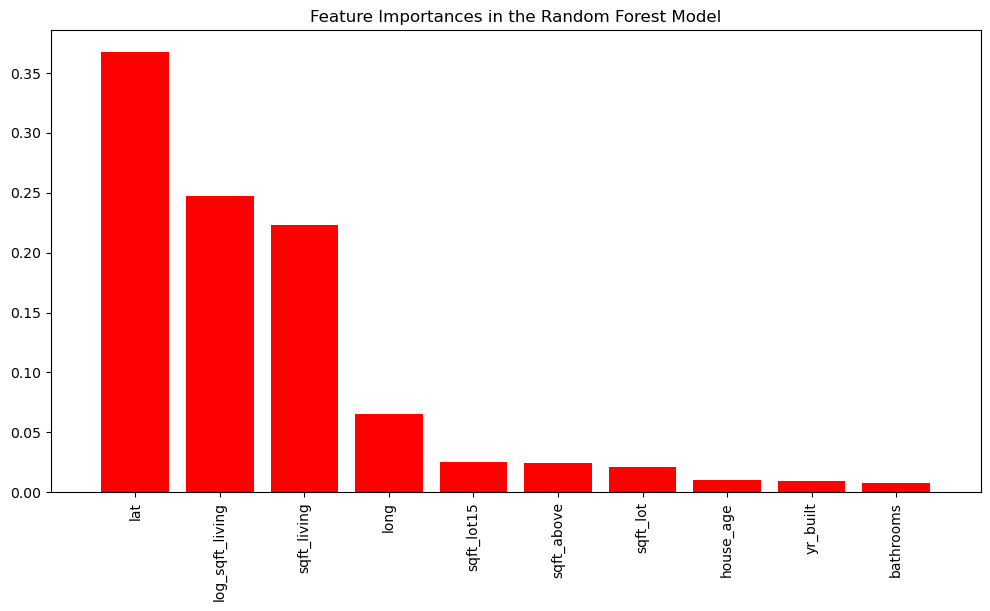

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importances
importances = optimized_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features[general_features].columns

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in the Random Forest Model")
plt.bar(range(features[general_features].shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(features[general_features].shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, features[general_features].shape[1]])
plt.show()


## Geospatial Distribution of House Prices

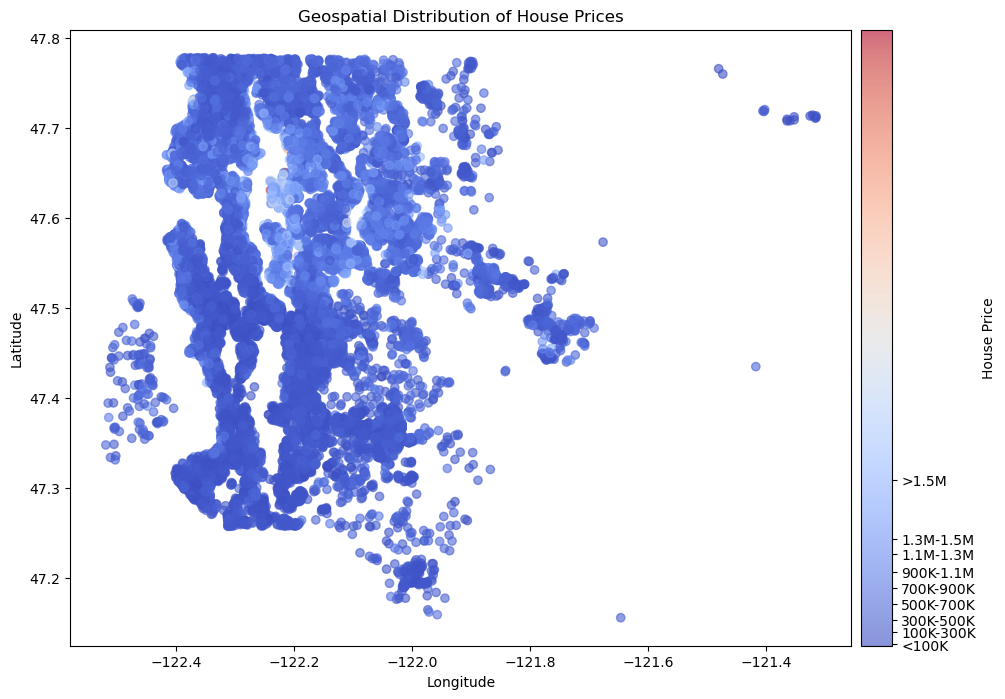

In [19]:
import matplotlib.pyplot as plt
import numpy as np


data = data.dropna(subset=['price'])

# price bins and labels with correct matching lengths
price_bins = [0, 100000, 300000, 500000, 700000, 900000, 1100000, 1300000, 1500000, float('inf')]
price_labels = ['<100K', '100K-300K', '300K-500K', '500K-700K', '700K-900K', '900K-1.1M', '1.1M-1.3M', '1.3M-1.5M', '>1.5M']

# categorized into 'price_category'
data['price_category'] = pd.cut(data['price'], bins=price_bins, labels=price_labels)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot price category color encoding
scatter = ax.scatter(data['long'], data['lat'], c=data['price'], cmap='coolwarm', alpha=0.6)

# colorbar with the price categories as ticks
colorbar = fig.colorbar(scatter, ax=ax, pad=0.01)
colorbar.set_label('House Price')

# colorbar ticks and labels
colorbar.set_ticks([np.mean(data['price'].loc[data['price_category'] == label]) for label in price_labels if not pd.isna(np.mean(data['price'].loc[data['price_category'] == label]))])
colorbar.set_ticklabels(price_labels)

plt.title('Geospatial Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


This geospatial map illustrates the distribution of house prices across a specific geographic region. Each point on the map represents a property, with its location determined by its longitude and latitude. The color of each point reflects the property's price category, ranging from deep blue for the most affordable properties to deep red for the most expensive ones. The color gradient facilitates the identification of regional price trends, revealing clusters of higher and lower-value properties. The map provides a visual summary of how house prices vary with location, offering insights into the spatial dynamics of the real estate market in the area.